# 1. Você lava as mãos de maneira correta?

No segundo semestre de 2017, eu cursei uma disciplina eletiva da minha graduação em engenharia biomédica chamada Biossegurança.

Nessa disciplina fizemos uma atividade em que nós, estudantes, recebemos tinta em nossas mãos e aplicamos as técnicas de higienização aprendidas na aula.

A intenção era que esfregassemos a mão de forma que a tinta cobrisse toda superfície da mão, simulando o processo de higienização das mãos.

Desvendados, pudemos perceber várias partes de nossas mãos nas quais não foi feita a higienização correta (partes que não haviam tinta).

<p><img src='images/226.jpg'></p>
<a href="https://www.freepik.com/free-photos-vectors/banner"> Créditos da imagem</a>

Desde esse dia, fiquei pensado na quantidade de vezes que achei que tinha "limpado" as mãos através da lavagem, mas na verdade, não tinha feito de maneira ideal e que fazer a higienização das mãos não é tão simples quanto parece.

Caso você queria aprender a lavar as mãos de maneira correta, assista esse <a href="https://www.youtube.com/watch?v=jS88eiufghc"> video </a>.

Mas minha intenção aqui não é ensinar você a lavar as maõs, mas convencer você do quão esse ato tão simples pode ser salvar vidas.

# 2. Conheça Dr. Ignaz Semmelweis

<p><img src='images/201381972233933580_20.jpg'></p>
<a http://www.santacasademaceio.com.br/2014/05/controle-da-infeccao-hospitalar-15-de-maio-teve-origem-na-austria/"> Créditos da imagem</a>

<p>Este é o Dr. Ignaz Semmelweis, médico húngaro nascido em 1818 que trabalhou no Hospital Geral de Viena. Se o Dr. Semmelweis parece preocupado, é provavelmente porque ele está pensando em febre no parto: uma doença mortal que afeta mulheres que acabaram de dar à luz. Ele está pensando nisso, porque no início dos anos 1840, no Hospital Geral de Viena, 10% das mulheres que dão à luz morriam por causa disso. Ele está pensando sobre isso porque conhece a causa da febre do parto: são as mãos contaminadas dos médicos que estão entregando os bebês. E adivinha só: eles não vão ouvir seus conselhos para lavar as mãos!</p>
<p>Neste projeto, vamos analisar novamente os dados que fizeram Semmelweis descobrir a importância da lavagem das mãos. Vamos começar analisando os dados que fizeram Semmelweis perceber que havia algo errado com os procedimentos do Hospital Geral de Viena.</p>

In [4]:
# importing modules
import pandas as pd

# Read datasets/yearly_deaths_by_clinic.csv into yearly
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

# Print out yearly
print(yearly)

    year  births  deaths    clinic
0   1841    3036     237  clinic 1
1   1842    3287     518  clinic 1
2   1843    3060     274  clinic 1
3   1844    3157     260  clinic 1
4   1845    3492     241  clinic 1
5   1846    4010     459  clinic 1
6   1841    2442      86  clinic 2
7   1842    2659     202  clinic 2
8   1843    2739     164  clinic 2
9   1844    2956      68  clinic 2
10  1845    3241      66  clinic 2
11  1846    3754     105  clinic 2


# 3. O número alarmante de mortes

A tabela acima mostra o número de mulheres que deram à luz nas duas clínicas do Hospital Geral de Viena nos anos de 1841 a 1846. Você notará que dar à luz era muito perigoso; um número alarmante de mulheres morreu como resultado do parto, a maioria por febre do parto.

Vemos isso mais claramente se considerarmos a proporção de mortes do número de mulheres que dão à luz. 

In [5]:
# Calculate proportion of deaths per no. births
yearly["proportion_deaths"] = yearly['deaths'] / yearly['births']

# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = yearly[yearly['clinic'] == 'clinic 1']
yearly2 = yearly[yearly['clinic'] == 'clinic 2']

# Print out yearly1
print(yearly1)

   year  births  deaths    clinic  proportion_deaths
0  1841    3036     237  clinic 1           0.078063
1  1842    3287     518  clinic 1           0.157591
2  1843    3060     274  clinic 1           0.089542
3  1844    3157     260  clinic 1           0.082357
4  1845    3492     241  clinic 1           0.069015
5  1846    4010     459  clinic 1           0.114464


# 4. Morte nas clínicas

Observe que na clínica 1, a porcentagem de mortes no parto varia de aproximadamente 7% à 15%.

Se agora traçarmos a proporção de mortes na clínica 1 e na clínica 2, veremos um padrão curioso ...

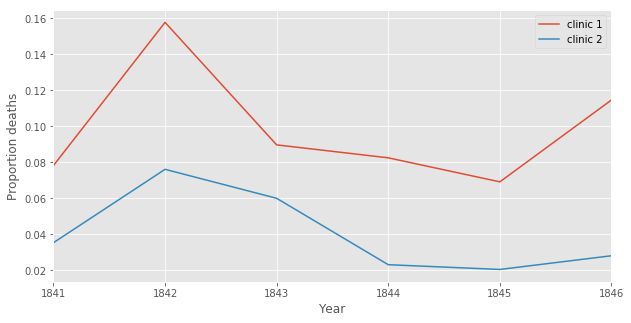

In [6]:
# Import matplotlib and set style 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

# Plot yearly proportion of deaths at the two clinics
ax = yearly1.plot(x="year", y="proportion_deaths", label="clinic 1", figsize=(10,5))
yearly2.plot(x="year", y="proportion_deaths", label="clinic 2", ax=ax)
ax.set_xlabel("Year")
ax.set_ylabel("Proportion deaths")
plt.show()

# 5. A lavagem das mãos começa ...

Por que a proporção de mortes é constantemente muito maior na Clínica 1? Semmelweis viu o mesmo padrão e ficou confuso e angustiado. A única diferença entre as clínicas era que muitos estudantes de medicina serviam na Clínica 1, enquanto a maioria das parteiras trabalhava na Clínica 2. Enquanto as parteiras cuidavam apenas das mulheres que pariam, os estudantes de medicina também passavam um tempo nas salas de autópsia examinando cadáveres.

Semmelweis começou a suspeitar que algo nos cadáveres, espalhado pelas mãos dos estudantes de medicina, causava febre no parto.

Então, numa tentativa desesperada de deter as altas taxas de mortalidade, ele decretou: Lave as mãos! Este foi um pedido pouco ortodoxo e controverso, ninguém em Viena sabia sobre bactérias naquele momento.

Vamos carregar dados mensais da Clínica 1 e investigar se a lavagem das mãos teve algum efeito.

In [7]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])

# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly['deaths'] / monthly['births']

# Print out the first rows in monthly
monthly.head()

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669
1,1841-02-01,239,18,0.075314
2,1841-03-01,277,12,0.043321
3,1841-04-01,255,4,0.015686
4,1841-05-01,255,2,0.007843


# 6. O efeito de lavar as mãos

Com os dados carregados, agora podemos observar a proporção de mortes ao longo do tempo. 

No gráfico abaixo, não marcamos onde começou a lavagem obrigatória das mãos, mas perceba que a proporção de mortes foi reduzida a tal ponto que você pode identificá-la tranquilamente.

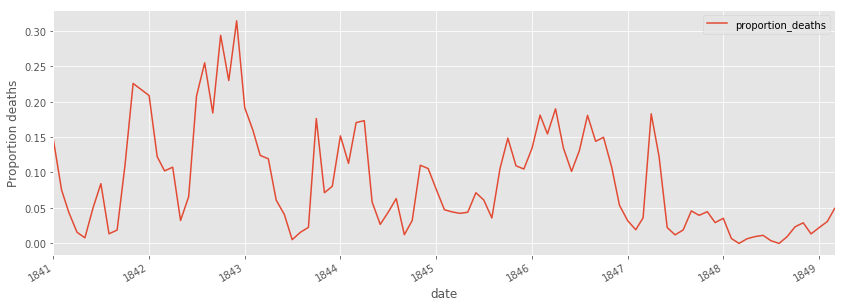

In [8]:
# Plot monthly proportion of deaths
ax = monthly.plot(x='date', y='proportion_deaths', figsize=(14,5))
ax.set_ylabel('Proportion deaths')
plt.show()

# 7. Destacando o efeito de lavar as mãos

A partir da metade de 1847, a proporção de mortes é drasticamente reduzida e, sim, foi quando Semmelweis tornou obrigatória a lavagem das mãos.

O efeito da lavagem das mãos fica ainda mais claro se destacarmos isso no gráfico.

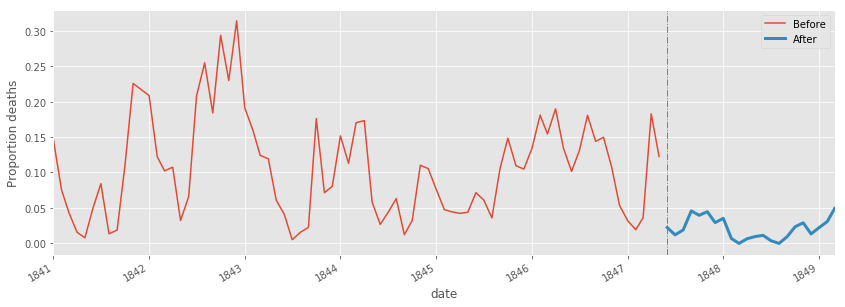

In [27]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly["date"] < handwashing_start]
after_washing = monthly[monthly["date"] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date', y='proportion_deaths', label='Before', figsize=(14,5))
after_washing.plot(x='date', y='proportion_deaths', label='After', linewidth=3, ax=ax)
ax.axvline(handwashing_start, color='gray', linewidth=1, linestyle='-.')
ax.set_ylabel('Proportion deaths')
plt.show()

# 8. Mais lavagem de mãos, menos mortes?

Novamente, o gráfico mostra que a lavagem das mãos teve um efeito enorme. 

Mas quanto a proporção mensal de mortes foi reduzida, em média?

In [10]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion = after_washing['proportion_deaths']
mean_diff = after_proportion.mean() - before_proportion.mean()
mean_diff

-0.08395660751183336

# 9. O quão confiável é essa afirmação?

A proporção de mortes foi reduzida em cerca de 8 pontos percentuais! 

De 10%, em média, a apenas 2% (que ainda é um número alto para os padrões modernos).

Para ter uma ideia da incerteza em torno de quanto a lavagem das mãos reduz a mortalidade, podemos observar o intervalo de confiança (aqui calculado usando o método de autoinicialização).

In [11]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025   -0.100983
0.975   -0.066889
dtype: float64

# 10. O destino do Dr. Semmelweis

Portanto, a lavagem das mãos reduziu a proporção de mortes entre 6.7 e 10 pontos percentuais, de acordo com um intervalo de confiança de 95%. Em suma, parece que Semmelweis tinha evidências sólidas de que a lavagem das mãos era um procedimento simples, mas altamente eficaz, que poderia salvar muitas vidas.

A tragédia é que, apesar das evidências, a teoria de Semmelweis - que a febre do filho foi causada por alguma "substância" (o que hoje conhecemos como bactérias) dos cadáveres das salas de autópsia - foi ridicularizada pelos cientistas contemporâneos. A comunidade médica rejeitou sua descoberta e em 1849 ele foi forçado a deixar o Hospital Geral de Viena para sempre.

Uma razão para isso foi que estatísticas e argumentos estatísticos eram incomuns na ciência médica no século XIX. Semmelweis só publicou seus dados como longas tabelas de dados brutos, mas não mostrou gráficos nem intervalos de confiança. Se ele tivesse acesso à análise que acabamos de fazer, ele poderia ter tido mais sucesso em convencer os médicos vienenses a lavar as mãos.